In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from azureml.core.authentication import ServicePrincipalAuthentication
from azureml.core import Workspace, Run as AzureMLRun

In [ ]:
plt.style.use("~/nice.mplstyle")

In [3]:
sp_auth = ServicePrincipalAuthentication(
    tenant_id=os.environ["AZURE_TENANT_ID"],
    service_principal_id=os.environ["AZURE_CLIENT_ID"],
    service_principal_password=os.environ["AZURE_CLIENT_SECRET"],
)
ws = Workspace(
    subscription_id=os.environ["AZURE_SUBSCRIPTION_ID"],
    resource_group="PSL-PMP-ML",
    workspace_name="psl-ml-workspace",
    auth=sp_auth,
)

In [4]:
run = AzureMLRun(ws.experiments["gfs-one-degree"], run_id="0ebe6206-a137-4f75-99dd-2c7a4ff88d3d")

In [11]:
tloss = np.array(list(run.get_metrics("train_mse_loss_epoch").values())).squeeze()
vloss = np.array(list(run.get_metrics("val_mse_loss_epoch").values())).squeeze()

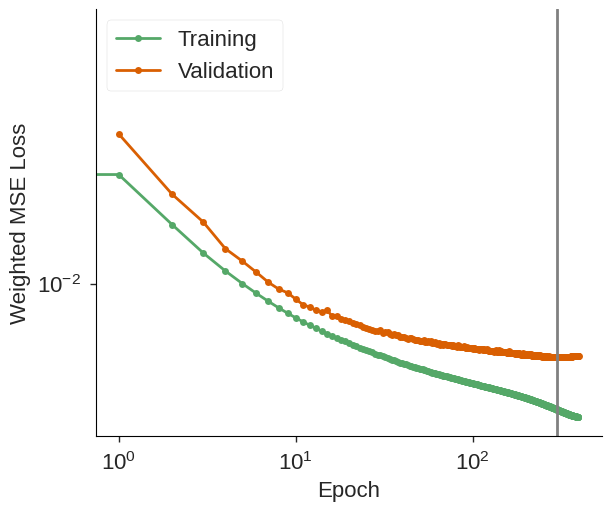

In [27]:
fig, ax = plt.subplots(figsize=(6,5), constrained_layout=True)

for x, y, label in zip(
    [np.arange(len(tloss)), np.arange(len(vloss))+1],
    [tloss, vloss],
    ["Training", "Validation"],
):
    ax.plot(
        x, y,
        marker="o",
        markersize=5,
        label=label,
    )
ax.set(
    yscale="log",
    xscale="log",
    xlabel="Epoch",
    ylabel="Weighted MSE Loss",
)
ax.axvline(x=300, color="gray")
ax.legend();
fig.savefig("/global/homes/t/timothys/anemoi-house/gfs/1.00-degree/figures/gfs_onedegree_loss.jpeg", dpi=300, bbox_inches="tight")

In [21]:
tsteploss = np.array(list(run.get_metrics("train_mse_loss_step").values())).squeeze()

In [24]:
len(tsteploss)*100

285500

In [25]:
_/300000

0.9516666666666667